In [2]:
import imgaug as ia
from imgaug import augmenters as iaa
from scipy import misc
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

from os import listdir
from os.path import isfile, join
import glob

%matplotlib inline

In [13]:
images = np.random.randint(0, 50, (4, 128, 128, 3), dtype=np.uint8)

images[0].shape

(128, 128, 3)

In [48]:
keypoints_on_images = []
images = []

for imfile in onlyjpegs[:10]:
    keypoints = []
    image = mpimg.imread(imfile)
    flable = open(imfile.replace('/images','/labels').replace('.jpeg','.txt'))
    
    labels = [cartuple(a) for a in flable]
    print([a[0] for a in labels])
    
    for label in labels:
        
        keypoints.append(ia.Keypoint(x=label[1], y= label[2]))
        keypoints.append(ia.Keypoint(x=label[1],y= label[4]))
        keypoints.append(ia.Keypoint(x=label[3],y= label[4]))
        keypoints.append(ia.Keypoint(x=label[3],y= label[2]))
              
    keypoints_on_images.append(ia.KeypointsOnImage(keypoints,shape=image.shape))
    images.append(image)
    
    

keypoints_on_images[0]
    

['Van', 'SUV', 'SUV', 'Van', 'SUV', 'Car', 'Car', 'Car', 'Car', 'Car', 'Van']
['Car', 'Car', 'Van', 'SUV', 'Van', 'SUV', 'SUV', 'SUV', 'SUV', 'SmallTruck', 'SUV', 'Van', 'Car', 'SUV', 'SmallTruck', 'SUV', 'Car', 'Car', 'SUV', 'Van', 'MediumTruck', 'Van', 'MediumTruck', 'Car', 'Car', 'Car', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'Car', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'MediumTruck', 'Van', 'Car', 'Car', 'Car', 'Van']
['Car', 'SUV', 'Car', 'MediumTruck', 'Car', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'Car', 'SUV', 'Car', 'Car', 'SUV', 'Car', 'Car', 'SUV']
['Car', 'Car', 'SUV', 'MediumTruck', 'LargeTruck', 'SUV', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car']
['SUV', 'Car', 'SUV', 'Van', 'Car', 'SmallTruck', 'SUV']
['SUV', 'SUV', 'SUV', 'SUV', 'Bus', 'Car', 'Car', 'Car', 'Car', 'Car', 'SUV', 'Bus', 'Van', 'Van', 'SUV', 'SUV', 'MediumTruck', 'MediumTruck']
['SUV', 'SUV', 'Car', 'SUV', 'SUV',

KeypointOnImage([Keypoint(x=227, y=36), Keypoint(x=227, y=64), Keypoint(x=286, y=64), Keypoint(x=286, y=36), Keypoint(x=561, y=402), Keypoint(x=561, y=479), Keypoint(x=699, y=479), Keypoint(x=699, y=402), Keypoint(x=267, y=62), Keypoint(x=267, y=82), Keypoint(x=301, y=82), Keypoint(x=301, y=62), Keypoint(x=638, y=113), Keypoint(x=638, y=181), Keypoint(x=706, y=181), Keypoint(x=706, y=113), Keypoint(x=389, y=130), Keypoint(x=389, y=161), Keypoint(x=451, y=161), Keypoint(x=451, y=130), Keypoint(x=376, y=89), Keypoint(x=376, y=115), Keypoint(x=419, y=115), Keypoint(x=419, y=89), Keypoint(x=7, y=88), Keypoint(x=7, y=111), Keypoint(x=36, y=111), Keypoint(x=36, y=88), Keypoint(x=40, y=55), Keypoint(x=40, y=70), Keypoint(x=64, y=70), Keypoint(x=64, y=55), Keypoint(x=419, y=83), Keypoint(x=419, y=104), Keypoint(x=458, y=104), Keypoint(x=458, y=83), Keypoint(x=35, y=66), Keypoint(x=35, y=82), Keypoint(x=60, y=82), Keypoint(x=60, y=66), Keypoint(x=75, y=61), Keypoint(x=75, y=86), Keypoint(x=106,

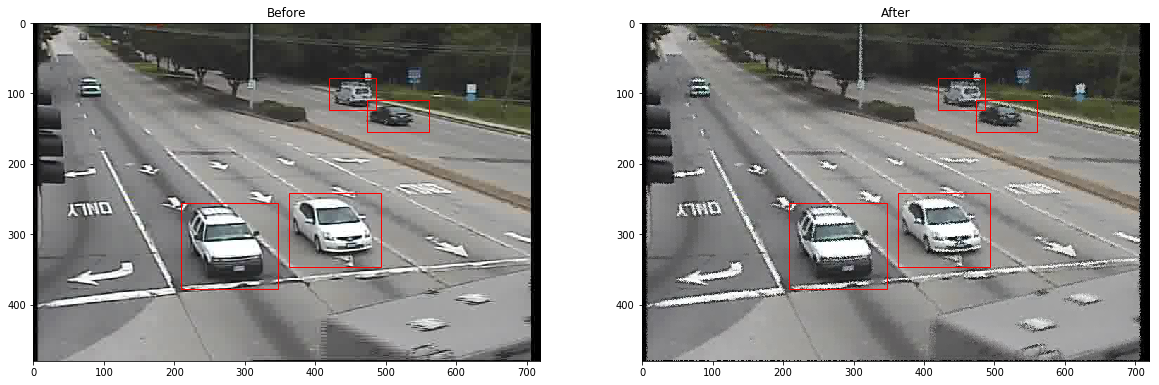

In [199]:
ai = 55

fig = plt.figure(figsize = (20,20))
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(images[ai], interpolation='none')

a.set_title('Before')
b = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(images_aug[ai], interpolation='none')
b.set_title('After')


for x in xrange(0,len(keypoints_on_images[ai].keypoints),4):
    kp = keypoints_on_images[ai].keypoints
    kp_aug = keypoints_aug[ai].keypoints
    
    rect = patches.Rectangle((kp[x].x,kp[x].y),(kp[x+2].x-kp[x].x),(kp[x+2].y-kp[x].y),linewidth=1,edgecolor='r',facecolor='none')
    a.add_patch(rect)
    rect = patches.Rectangle((kp_aug[x].x,kp_aug[x].y),(kp_aug[x+2].x-kp_aug[x].x),(kp_aug[x+2].y-kp_aug[x].y),linewidth=1,edgecolor='r',facecolor='none')
    b.add_patch(rect)

#for l in x:
#    rect = patches.Rectangle((l[1],l[2]),(l[3]-l[1]),(l[4]-l[2]),linewidth=1,edgecolor='r',facecolor='none')
#    a.add_patch(rect)

In [161]:
onlyjpegs = glob.glob('/home/stp8954/aic/aic480/train/images/*.jpeg')
imagesamples = []
labels = []
labelmap = dict()


for i in range(0,500):
    ch = random.choice(onlyjpegs)
    imagesamples.append(ch)
    label = ch.replace('/images/','/labels/').replace('.jpeg','.txt')
    labels.append(label)
 

    
keypoints_on_images = []
images = []

for imfile, label in zip(imagesamples, labels):
    keypoints = []
    image = mpimg.imread(imfile)
    
    flable = open(label)
    
    ls = [cartuple(a) for a in flable]
    
    labelmap[label] = [a[0] for a in ls]
    
    for label in ls:
        
        keypoints.append(ia.Keypoint(x=label[1], y= label[2]))
        keypoints.append(ia.Keypoint(x=label[1],y= label[4]))
        keypoints.append(ia.Keypoint(x=label[3],y= label[4]))
        keypoints.append(ia.Keypoint(x=label[3],y= label[2]))
              
    keypoints_on_images.append(ia.KeypointsOnImage(keypoints,shape=image.shape))
    images.append(image)
    

In [198]:
import imgaug as ia
from imgaug import augmenters as iaa

seq = iaa.Sequential(
[
    #iaa.Fliplr(1)
    #iaa.Flipud(1)
    #iaa.GaussianBlur((2.5, 3.0))
    #iaa.Affine(scale={"x": (0.8), "y": (0.8)})
    #iaa.Affine(shear=(-16, 16))
    #iaa.Affine(rotate=(-45, 45)) # messes up with labels
    #iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2)
    #iaa.Multiply((0.5, 1.5), per_channel=0.5)
    iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)
   
],
    random_order=True
)

seq_det = seq.to_deterministic()

images_aug = seq_det.augment_images(images)
keypoints_aug = seq_det.augment_keypoints(keypoints_on_images)

In [163]:
path = '/home/stp8954/aic/aic480/augmented/images/'
pathl = '/home/stp8954/aic/aic480/augmented/labels/'
count = 3500
index = 0
for img, kpi in (zip(images_aug,keypoints_aug)):
   # print("processing image: %s" % imagesamples[index])
   # print("processing label: %s" % labels[index])
    fname = str(count)+'.jpeg'
    flname = str(count)+'.txt'
    misc.imsave(join(path,fname),img)
    kps = kpi.keypoints
    
    f = open(join(pathl,flname),'w')
    li = 0
    l = labelmap[labels[index]]
    #print(len(l))
    for x in xrange(0, len(kps),4):
        #print(li)
        f.write('%s %s %s %s %s\n' %(l[li],kps[x].x,kps[x].y,kps[x+2].x,kps[x+2].y))
        li += 1
    
    f.close()        
    count = count + 1
    index = index + 1
    

In [164]:
def cartuple(l):
    x = l.split(' ')
    return [x[0], int(x[1]),int(x[2]),int(x[3]),int(x[4])]

#onlyjpegs = glob.glob('/home/stp8954/aic/aic480/train/images/*.jpeg')

img = mpimg.imread('/home/stp8954/aic/aic480/augmented/images/3700.jpeg')

f = open('/home/stp8954/aic/aic480/augmented/labels/3700.txt','r')

img2 = mpimg.imread('/home/stp8954/aic/aic480/train/images/princess_anne_lynnhaven_20140604_07968.jpeg')

f2 = open('/home/stp8954/aic/aic480/train/labels/princess_anne_lynnhaven_20140604_07968.txt','r')



x = [ cartuple(a) for a in f]
x2 = [ cartuple(a) for a in f2]

#onlyjpegs[0].replace('/images','/labels').replace('.jpeg','.txt')

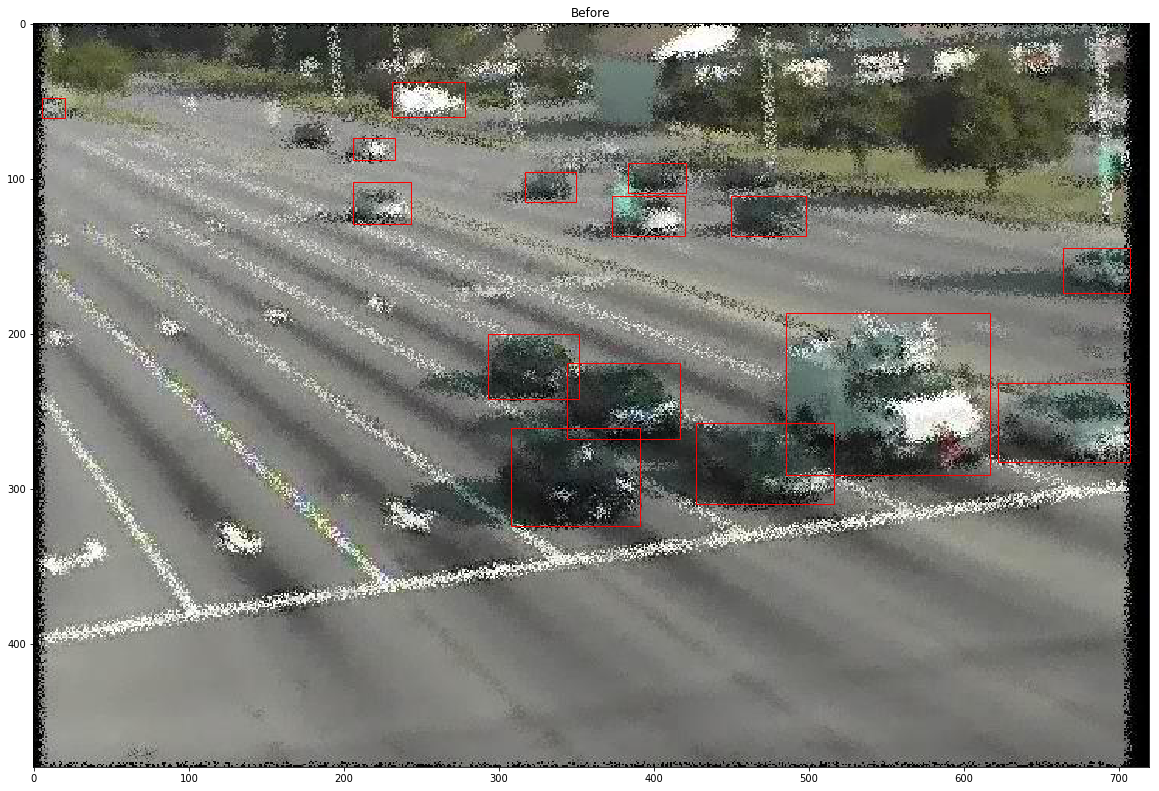

In [166]:
fig = plt.figure(figsize = (20,20))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(img, interpolation='none')

for l in x:
    rect = patches.Rectangle((l[1],l[2]),(l[3]-l[1]),(l[4]-l[2]),linewidth=1,edgecolor='r',facecolor='none')
    a.add_patch(rect)

a.set_title('Before')
#a = fig.add_subplot(1, 2, 2)
#imgplot = plt.imshow(img2, interpolation='none')
#for l in x2:
#    rect = patches.Rectangle((l[1],l[2]),(l[3]-l[1]),(l[4]-l[2]),linewidth=1,edgecolor='r',facecolor='none')
#    a.add_patch(rect)
#a.set_title('After')